<p align="center">
<img src="graphics./graph_1.png" alt="graph_1" style="width:500px;"/>
</p>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Breast_Cancer.csv')

In [2]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [3]:
data.rename(columns={"Reginol Node Positive":"Regional Node Positive"}, inplace=True)

In [4]:
print("A shape of the dataset: {}".format(data.shape))

A shape of the dataset: (4024, 16)


In [5]:
summary = pd.DataFrame(data.dtypes, columns = ['dtypes'])
summary = summary.reset_index()
summary['Column'] = summary['index']
summary = summary[['Column','dtypes']]
summary['Uniques'] = data.nunique().values
summary['NaN'] = data.isna().sum().values

summary

,Column,dtypes,Uniques,NaN
0,Age,int64,40,0
1,Race,object,3,0
2,Marital Status,object,5,0
3,T Stage,object,4,0
4,N Stage,object,3,0
5,6th Stage,object,5,0
6,differentiate,object,4,0
7,Grade,object,4,0
8,A Stage,object,2,0
9,Tumor Size,int64,110,0


In [6]:
data.describe()

,Age,Tumor Size,Regional Node Examined,Regional Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [7]:
cat_vars = [col for col in data.columns if data[col].dtype == 'object']
num_vars = [col for col in data.columns if data[col].dtype != 'object']

print("Categorical Variables:\n\n" + str(cat_vars))
print("\n\nNumerical Variables:\n\n" + str(num_vars))

Categorical Variables:

['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status']


Numerical Variables:

['Age', 'Tumor Size', 'Regional Node Examined', 'Regional Node Positive', 'Survival Months']


<p align="center">
<img src="graphics./graph_2.png" alt="graph_2" style="width:400px;"/>
</p>

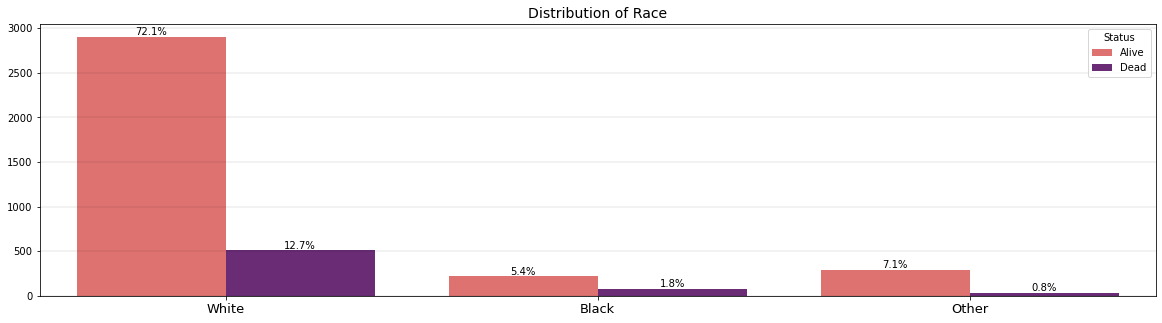

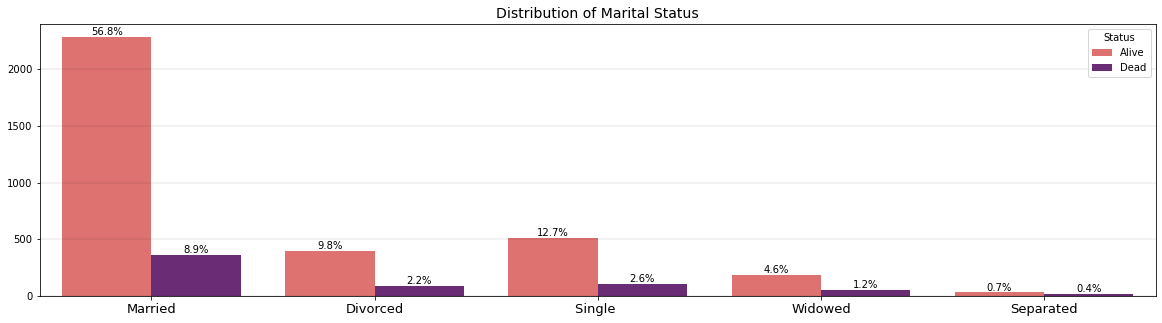

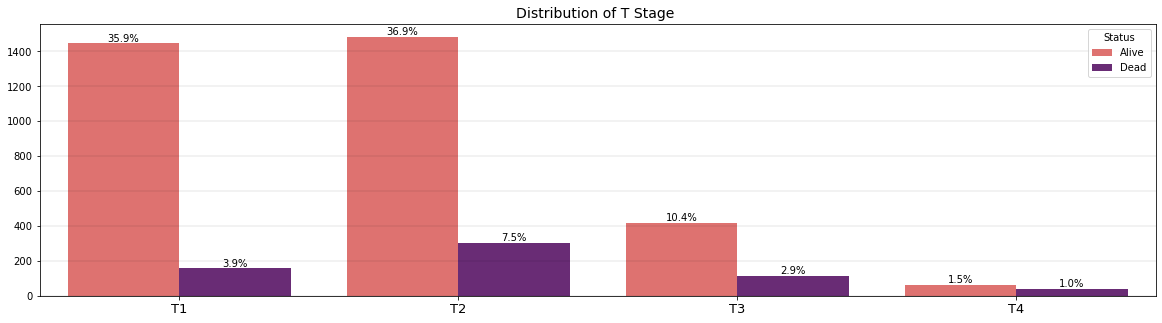

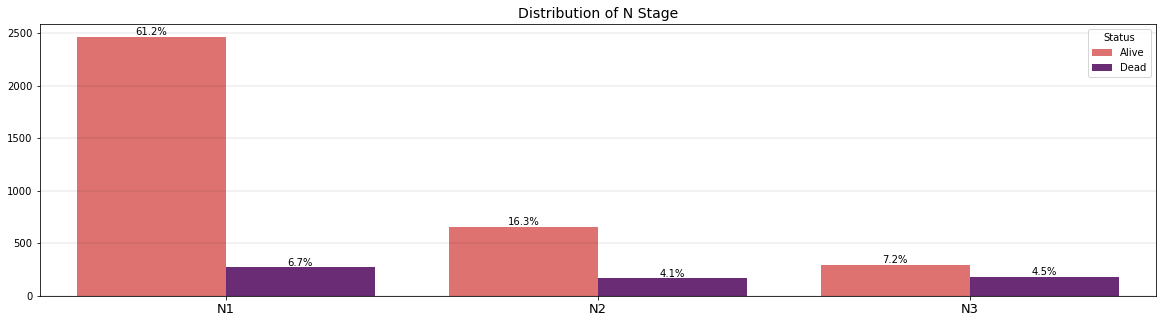

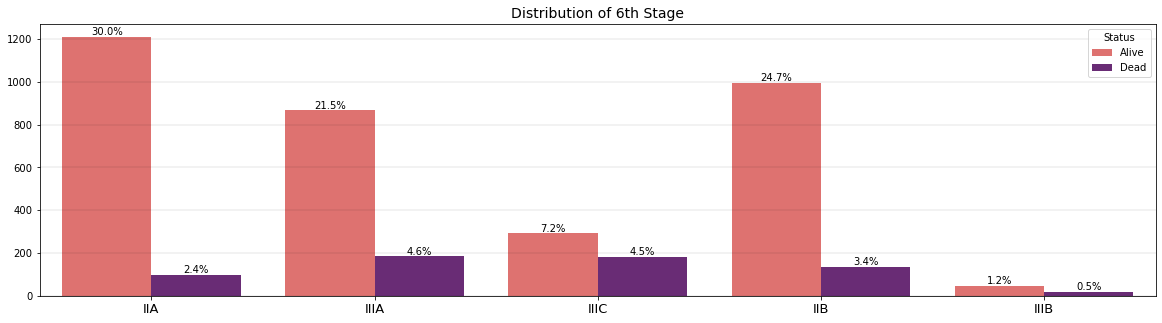

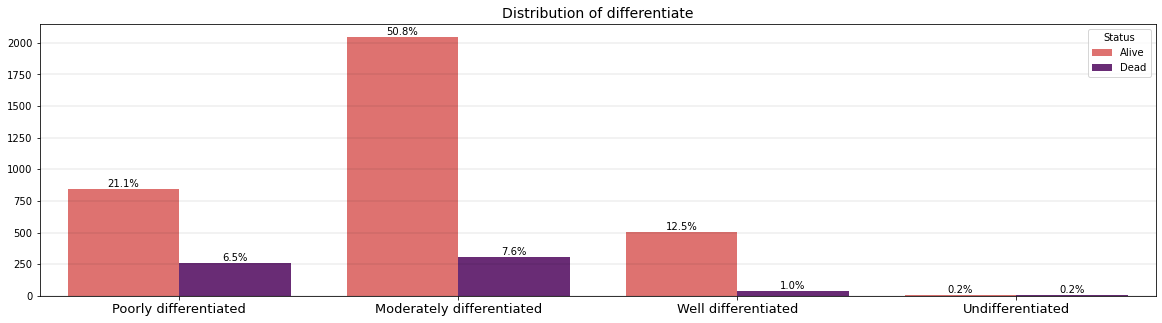

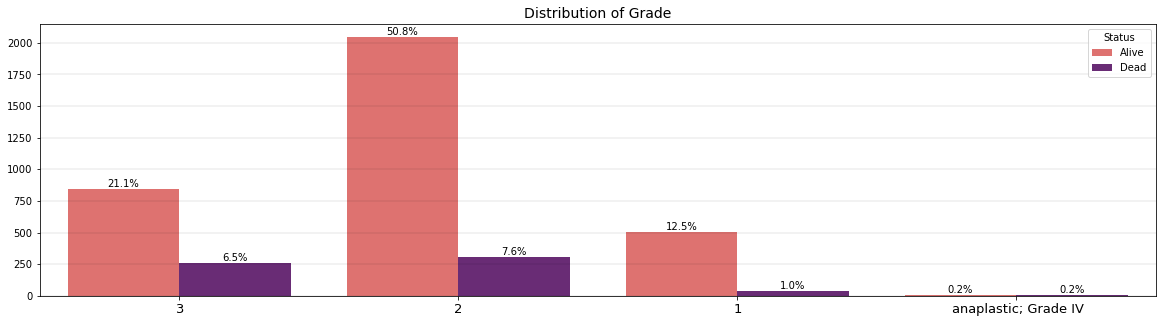

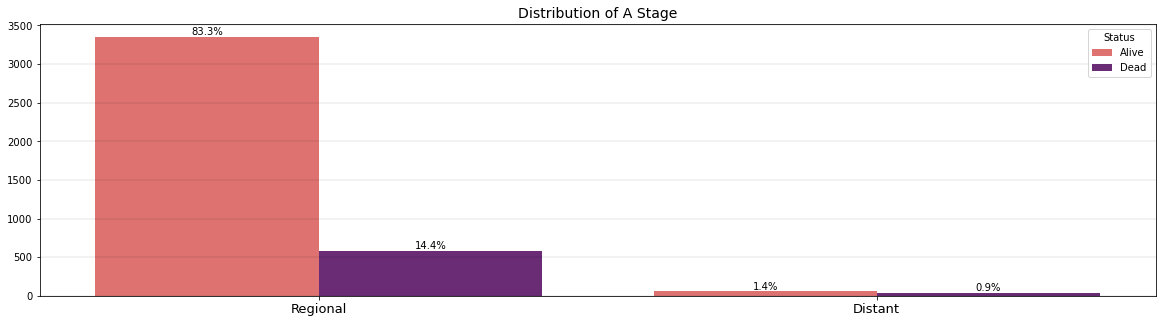

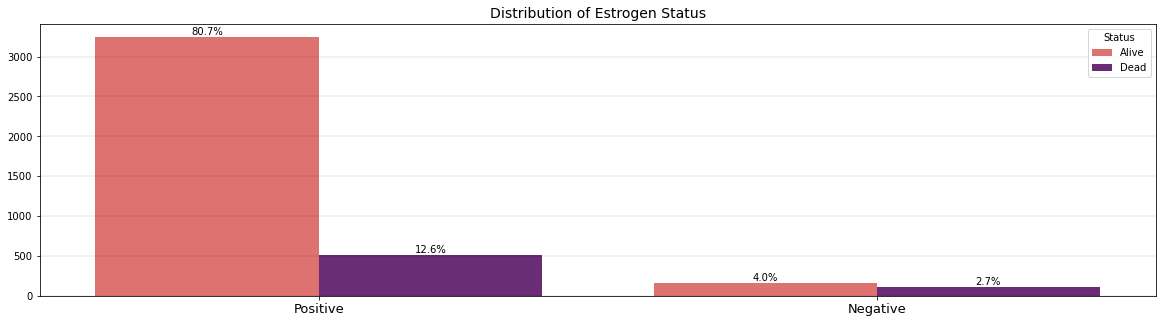

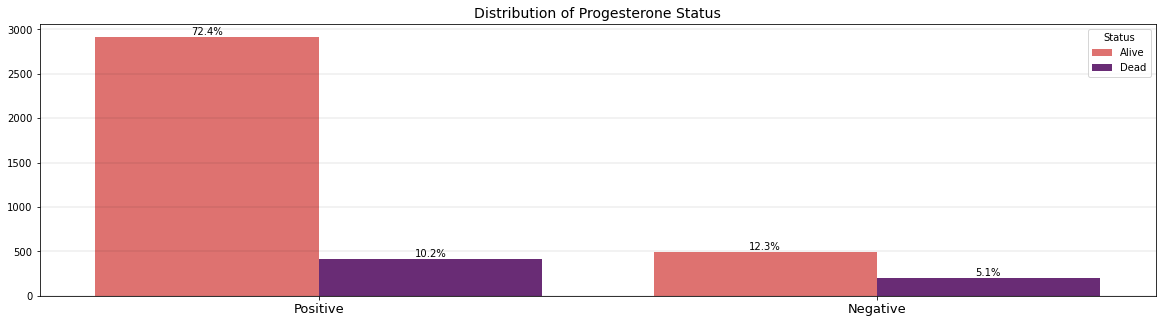

In [8]:
for i in cat_vars[:-1]:    
        
        fig = plt.figure(figsize = (20, 5))
        ax = sns.countplot(x = i, data = data, palette = "magma_r", hue = 'Status')

        for p in ax.patches:
            
                percentage = '{:.1f}%'.format(100 * p.get_height() / data.shape[0])
                x = p.get_x() + p.get_width() / 2
                y = p.get_y() + p.get_height() + 0.02
                ax.annotate(percentage, (x, y), ha = 'center', va = 'bottom', color = 'black', xytext = (0, 0),
                            rotation = 'horizontal', textcoords = 'offset points')

        plt.xticks(rotation = 0, fontsize = 13)
        ax.grid(axis = 'y', linewidth = 0.1, color = "black")
        ax.set_xlabel('')
        ax.set_ylabel('')
        plt.title('Distribution of '+ i, fontsize = 14)
        plt.show()

<p align="center">
<img src="graphics./graph_3.png" alt="graph_3" style="width:400px;"/>
</p>

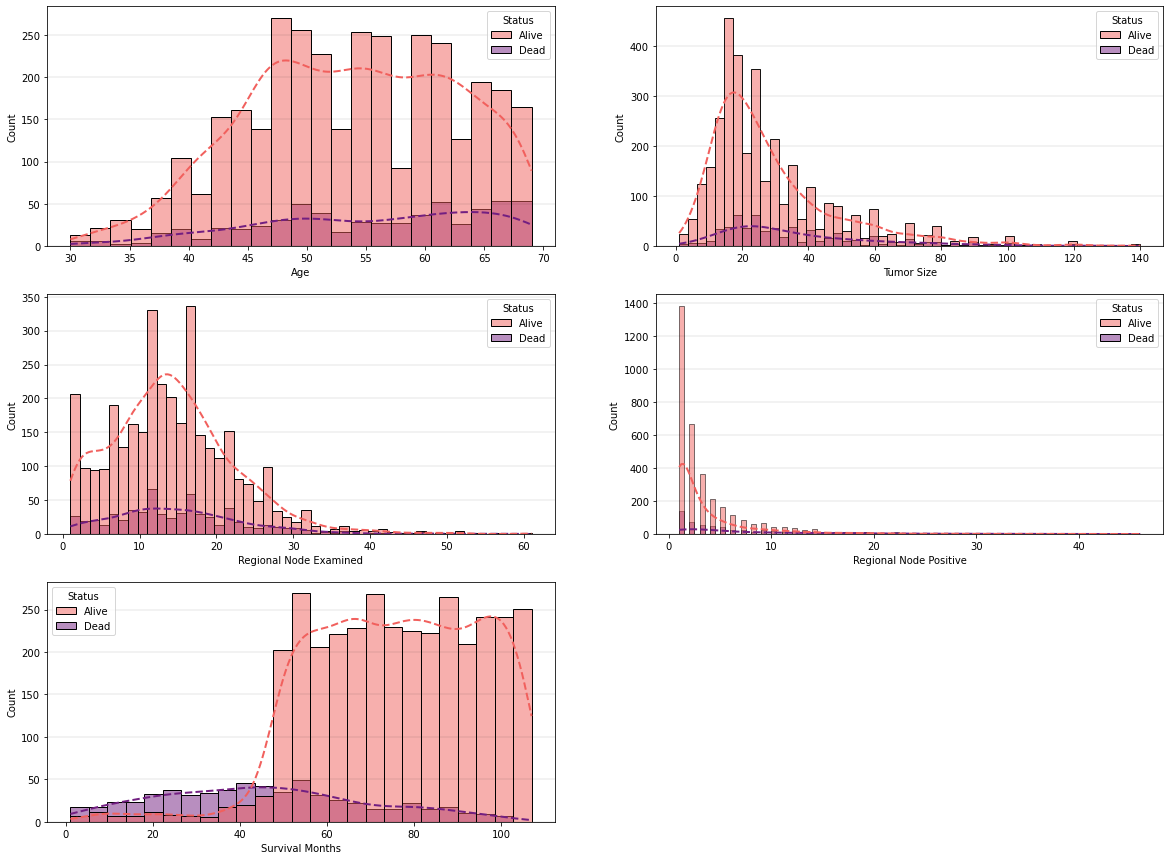

In [9]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 15))

for i, col in enumerate(num_vars):
    sns.histplot(data = data, x = col, hue = "Status", kde = True, palette = 'magma_r', ax = ax.flatten()[i],
                line_kws={"linewidth" : 2, "linestyle" : "--"})
    ax.flatten()[i].grid(axis = 'y', linewidth = 0.1, color = 'black')


ax.flatten()[-1].set_visible(False)
plt.show()

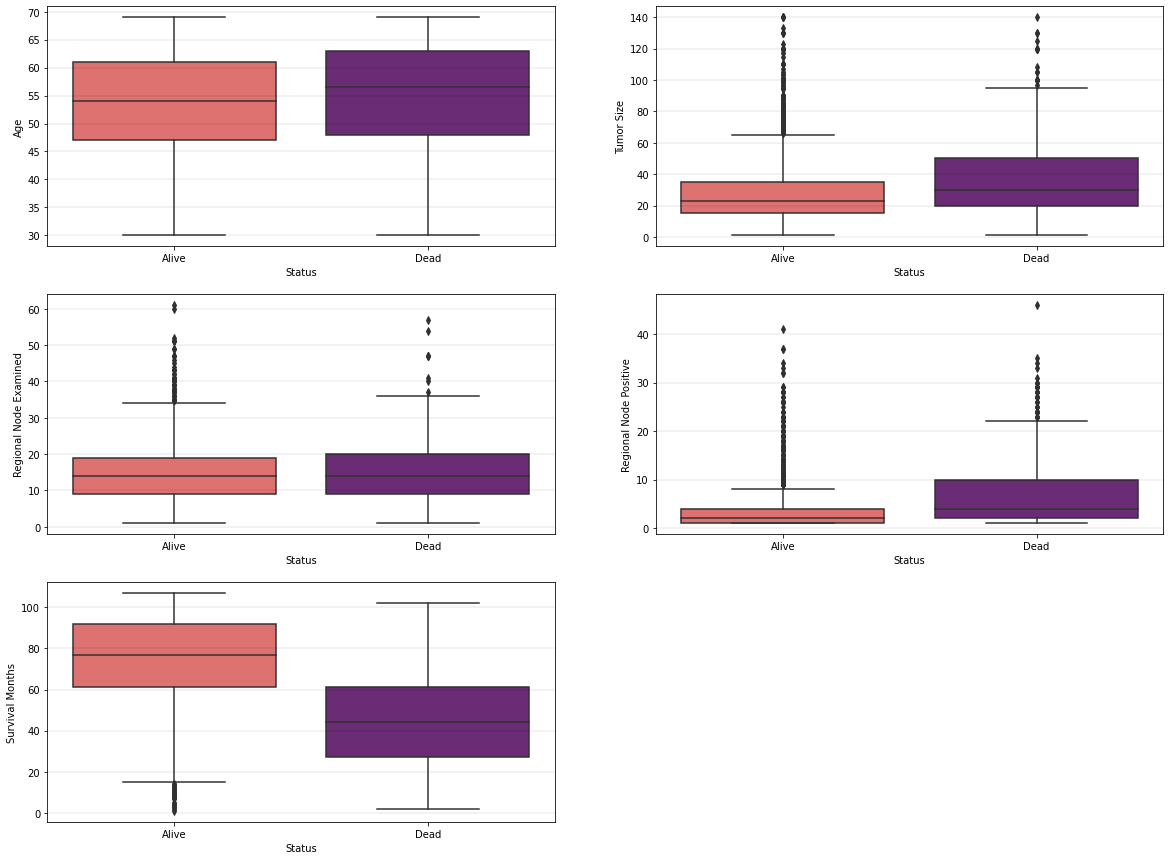

In [10]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize=(20, 15))

for i, col in enumerate(num_vars):
    sns.boxplot(data = data, x = 'Status', y = col, palette = 'magma_r', ax = ax.flatten()[i])
    ax.flatten()[i].grid(axis = 'y', linewidth = 0.1, color = 'black')

ax.flatten()[-1].set_visible(False)
plt.show()

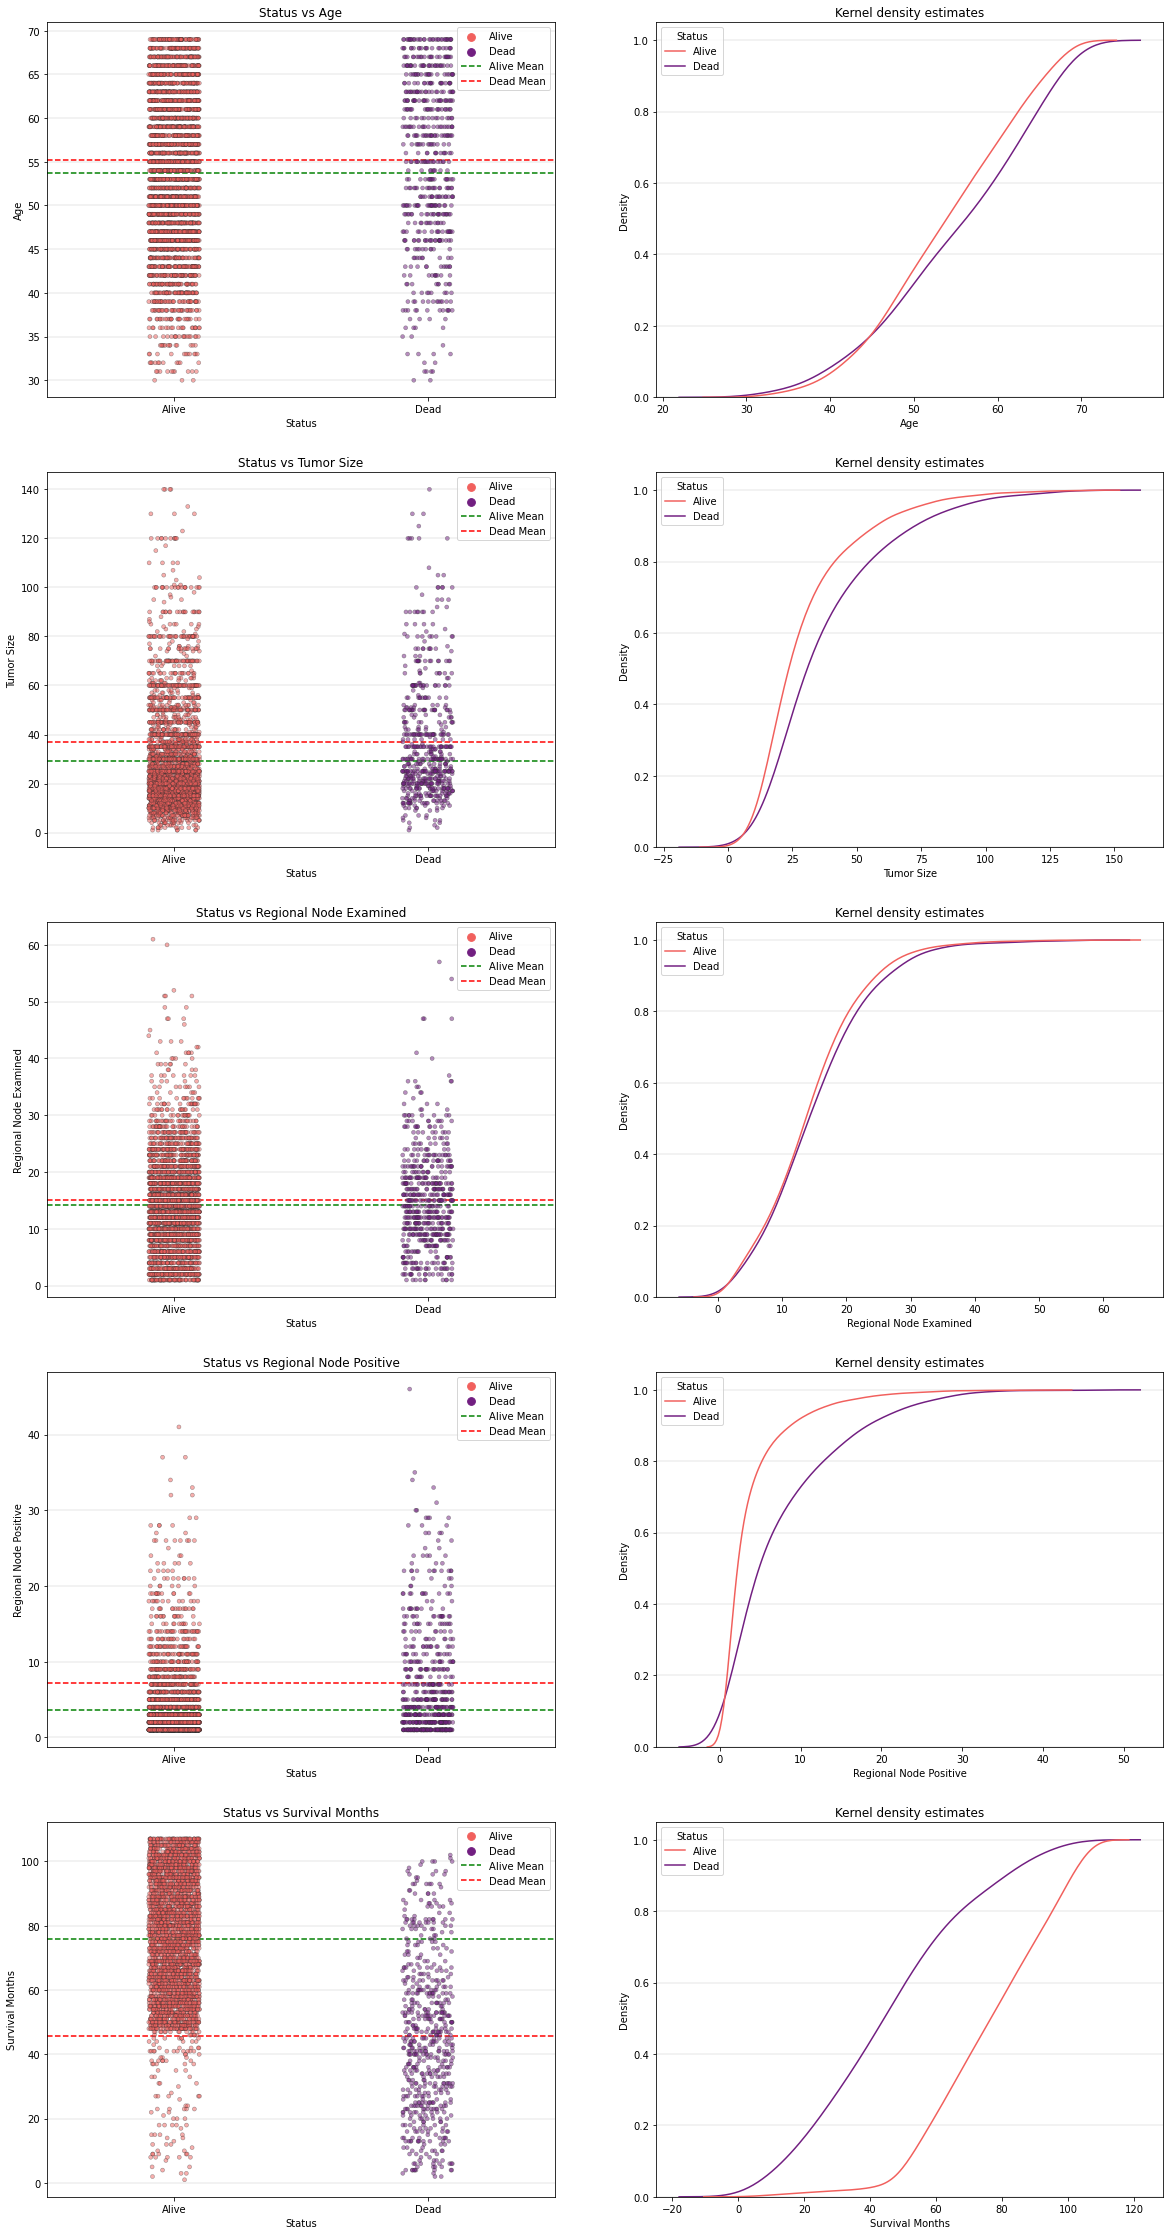

In [11]:
fig, ax = plt.subplots(nrows = 5, ncols = 2, figsize = (20, 40))

for i, col in enumerate(num_vars):
    
    ax_left = ax[i][0]
    ax_right = ax[i][1]
    
    sns.stripplot(data = data, x = 'Status', y = col, palette = 'magma_r', hue = 'Status', linewidth = 0.5, 
                  size = 4, ax = ax_left, alpha = 0.5)
    
    ax_left.axhline(np.mean(data[data['Status'] == 'Alive'][col]), linestyle = '--', color = 'green', 
                    linewidth = 1.5, label = 'Alive Mean')
    
    ax_left.axhline(np.mean(data[data['Status'] == 'Dead'][col]), linestyle = '--', color = 'red', linewidth = 1.5, 
                    label = 'Dead Mean')
    
    sns.kdeplot(data = data, x = col, hue = 'Status', ax = ax_right, palette = 'magma_r', cumulative = True, 
                warn_singular = False, linewidth = 1.5, common_norm = False)
    
    ax_left.set_title(f'Status vs {col}')
    ax_right.set_title('Kernel density estimates')
    
    
    ax_left.grid(axis = 'y', linewidth = 0.1, color = 'black')
    ax_right.grid(axis = 'y', linewidth = 0.1, color = 'black')
    
    ax_left.legend()
        
plt.show()

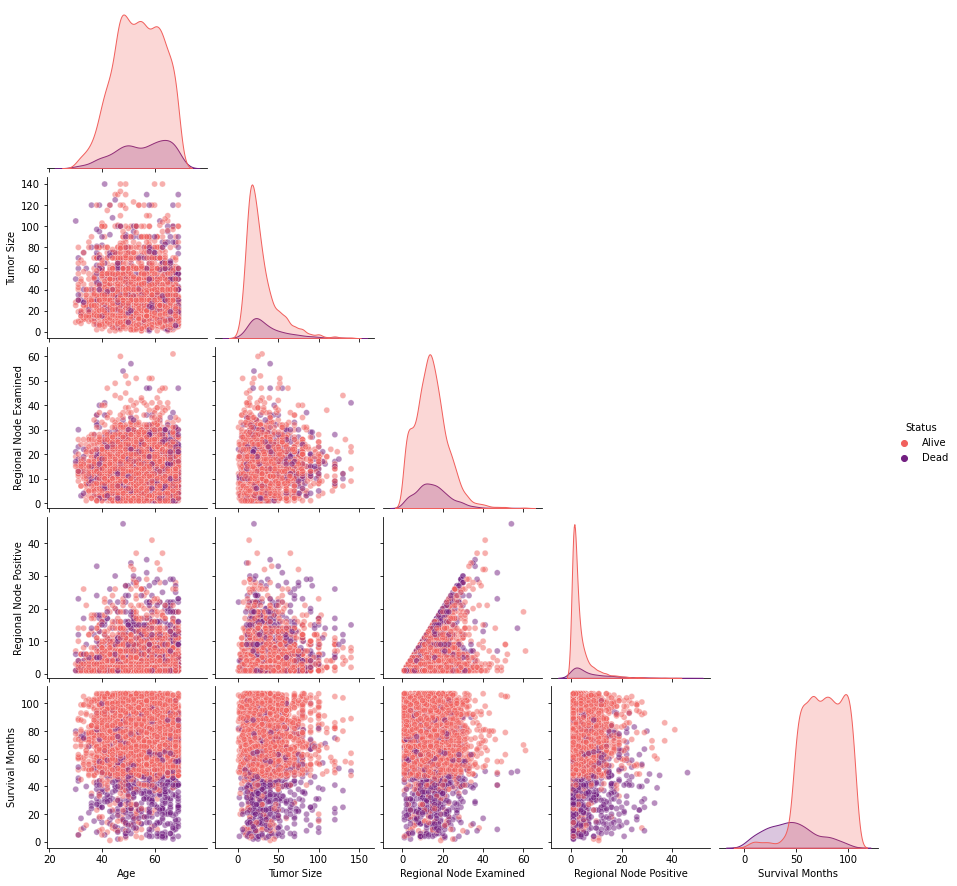

In [12]:
sns.pairplot(data, hue = 'Status', diag_kind = 'kde', palette = 'magma_r', corner = True,  plot_kws = {'alpha' : 0.5})
plt.show()

<p align="center">
<img src="graphics./graph_4.png" alt="graph_4" style="width:500px;"/>
</p>

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, plot_roc_curve, precision_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTENC
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [14]:
X = data.drop(columns = 'Status').copy()
y = pd.DataFrame(np.where(data["Status"] == 'Alive', 0, 1), columns = ['Status'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2022)

In [15]:
X_cat = list(data[cat_vars[:-1]])
X_num = list(data[num_vars])

pipe_cat = Pipeline([('ohe', OneHotEncoder(sparse = False, drop = None))])
pipe_num = Pipeline([('scaler', StandardScaler())])

preprocessor = ColumnTransformer([('num', pipe_num, X_num), ('cat', pipe_cat, X_cat)])

X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns = X_num + 
                       list(preprocessor.named_transformers_['cat'].named_steps['ohe'].get_feature_names(X_cat)))

X_test = pd.DataFrame(preprocessor.transform(X_test), columns = X_num +
                         list(preprocessor.named_transformers_['cat'].named_steps['ohe'].get_feature_names(X_cat)))

In [16]:
X_train.head()

,Age,Tumor Size,Regional Node Examined,Regional Node Positive,Survival Months,Race_Black,Race_Other,Race_White,Marital Status_Divorced,Marital Status_Married,...,Grade_ anaplastic; Grade IV,Grade_1,Grade_2,Grade_3,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
0,-1.560463,1.782725,0.950277,-0.425454,0.643132,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,-1.336256,-0.021774,-0.783045,-0.425454,-0.321239,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,1.017916,2.210107,0.702659,-0.425454,-0.058229,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,-0.551532,-0.306695,1.074085,-0.229946,-0.934930,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.578433,-0.449155,1.197894,-0.620962,1.169152,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [17]:
def balance_plot(data, ax):
    
    sns.scatterplot(x = 'Tumor Size', y = 'Regional Node Positive', data = data, ax = ax[0], hue = 'Status', 
                alpha = 0.5, palette = 'magma_r')
    
    axs = sns.countplot(x = 'Status', data = data, ax = ax[1], palette = 'magma_r')
    
    for p in axs.patches:
    
        percentage = '{:.1f}%'.format(100 * p.get_height() / data.shape[0])
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() + 0.02
        axs.annotate(percentage, (x, y), ha = 'center', va = 'bottom', color = 'black', xytext = (0, 0), 
                     rotation = 'horizontal', textcoords = 'offset points')
    
    plt.xticks(rotation = 0, fontsize = 13)
    
    ax[0].grid(axis = 'y', linewidth = 0.1, color = "black")
    ax[1].grid(axis = 'y', linewidth = 0.1, color = "black")
    
    ax[0].set(title = 'Distribution of training data by Status')
    ax[1].set(ylabel = '')
    
    plt.show()

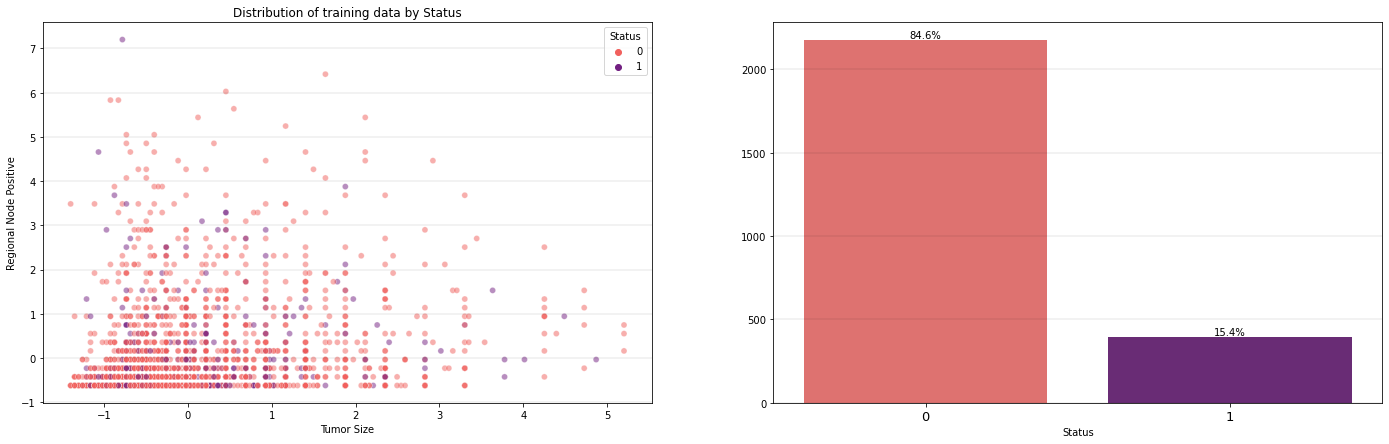

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (24, 7))

training_data = pd.merge(X_train, y_train, right_index = True, left_index = True)
balance_plot(training_data, ax)

In [19]:
smote_nc = SMOTENC(categorical_features = list(range(5, len(training_data.columns) - 1)), random_state = 2022)
X_train_smote, y_train_smote = smote_nc.fit_resample(X_train, y_train)

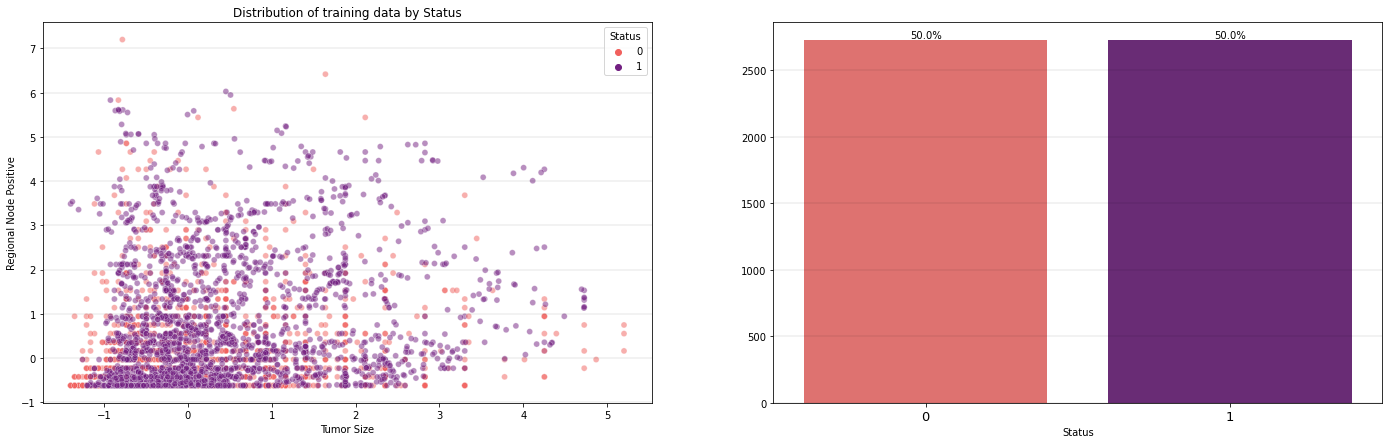

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (24, 7))

training_data_smote = pd.merge(X_train_smote, y_train_smote, right_index = True, left_index = True)
balance_plot(training_data_smote, ax)

In [21]:
def show_stats(model_name, test, predict):
    
    results = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'], index = [str(model_name)])
    
    results['Accuracy'] = round(accuracy_score(test, predict), 3)
    results['Precision'] = round(precision_score(test, predict), 3)
    results['Recall'] =  round(recall_score(test, predict), 3)
    results['F1 Score'] = round(f1_score(test, predict), 3)
    results['ROC AUC'] = round(roc_auc_score(y_test, predict), 3)
    
    return results

In [22]:
def show_plots(model, xtest, ytest, predict):
    
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
    
    cm = confusion_matrix(ytest, predict)
    conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual: 0', 'Actual: 1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', linewidths = 0.5, ax = ax[0])
    
    plot_roc_curve(model, X_test, y_test, ax = ax[1], color = '#5A2767')
    ax[1].set(title = 'ROC Curve')
    ax[1].grid(axis = 'y', linewidth = 0.1, color = 'black')
    ax[1].plot([0, 1], [0, 1], linewidth = 1, color = '#E1665C', linestyle = '--') 
    
    plt.show()

<p align="center">
<img src="graphics./graph_5.png" alt="graph_5" style="width:400px;"/>
</p>

In [23]:
lg = LogisticRegression(penalty = 'l2', random_state = 2022)

lg.fit(X_train_smote, y_train_smote)
lg_prediction = lg.predict(X_test)

show_stats('Logistic Regression', y_test, lg_prediction)

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.826,0.455,0.699,0.551,0.774


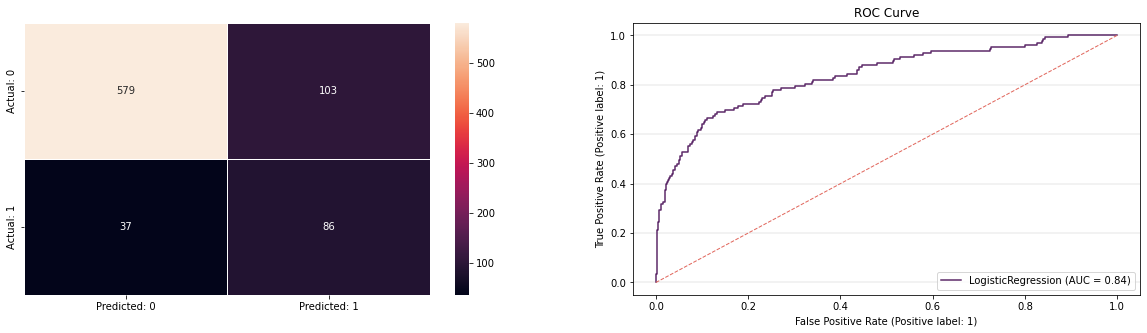

In [24]:
show_plots(lg, X_test, y_test, lg_prediction)

<p align="center">
<img src="graphics./graph_6.png" alt="graph_6" style="width:400px;"/>
</p>

In [25]:
svc = SVC(kernel = 'linear', random_state = 2022)

svc.fit(X_train_smote, y_train_smote)
svc_prediction = svc.predict(X_test)

show_stats('SVC', y_test, svc_prediction)

,Accuracy,Precision,Recall,F1 Score,ROC AUC
SVC,0.829,0.459,0.691,0.552,0.772


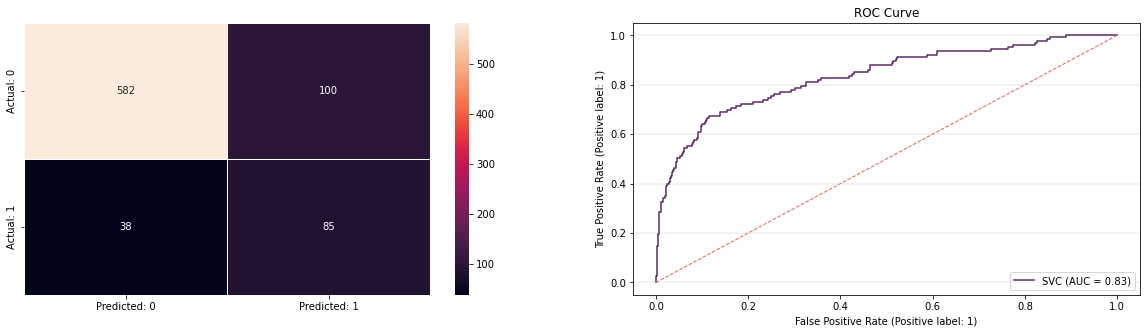

In [26]:
show_plots(svc, X_test, y_test, svc_prediction)

<p align="center">
<img src="graphics./graph_7.png" alt="graph_7" style="width:400px;"/>
</p>

In [27]:
gb = GradientBoostingClassifier(random_state = 2022)

gb.fit(X_train_smote, y_train_smote)
gb_prediction = gb.predict(X_test)

show_stats('Gradient Boosting Classifier', y_test, gb_prediction)

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Gradient Boosting Classifier,0.872,0.569,0.667,0.614,0.788


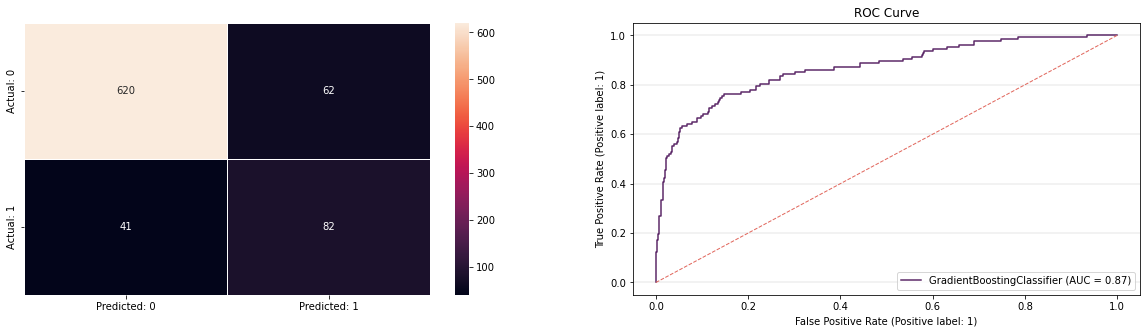

In [28]:
show_plots(gb, X_test, y_test, gb_prediction)

------

<div style="text-align: right"> <b>Author:</b> Dawid Kapcia </div>